In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [2]:
mobile_data = pd.read_csv('mobile_price_train_data.csv')

In [3]:
mobile_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
mobile_data['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [5]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [6]:
mobile_data.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


In [7]:
y = mobile_data['price_range']
X = mobile_data.drop('price_range', axis = 1)

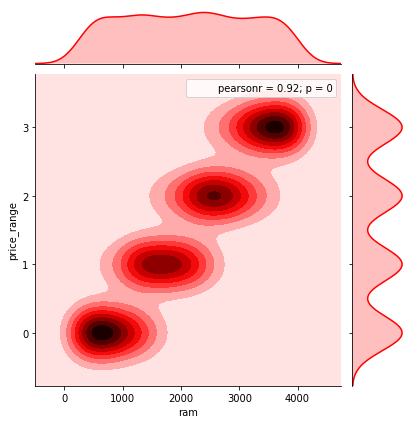

In [8]:
sns.jointplot(x='ram', y='price_range', data=mobile_data, color='red', kind='kde')

In [9]:
labels = ['3G-supported', '3g-Notsupported']
values = mobile_data['three_g'].value_counts().values

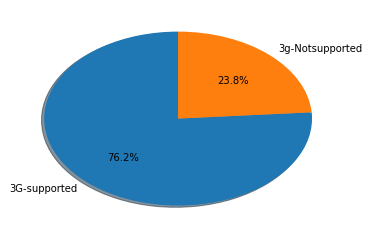

In [10]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels = labels, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.show()

In [11]:
labels_tc = ['touchscreen_supported', 'touchscreen_notsupported']
values_tc = mobile_data['touch_screen'].value_counts().values

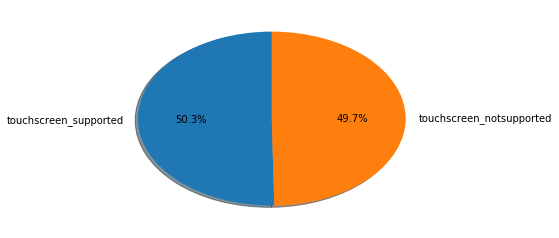

In [12]:
fig2, ax2 = plt.subplots()
ax2.pie(values_tc, labels=labels_tc, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

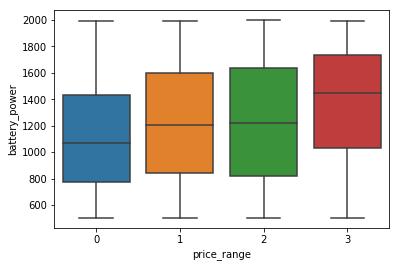

In [13]:
sns.boxplot(x='price_range', y='battery_power', data=mobile_data)

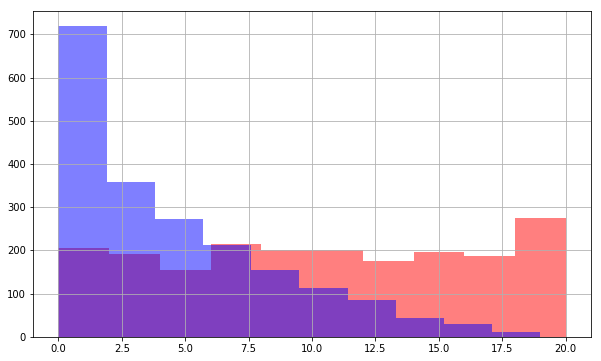

In [14]:
plt.figure(figsize=(10, 6))
mobile_data['pc'].hist(alpha=0.5, color='red', label='Primary Camera')
mobile_data['fc'].hist(alpha=0.5, color='blue', label='Front Camera')
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [16]:
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [17]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_lm = lm.predict(X_test)

In [18]:
lm.score(X_test, y_test)

0.9098532700029794

In [19]:
#Elbow Method to determine best K

error_rate = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

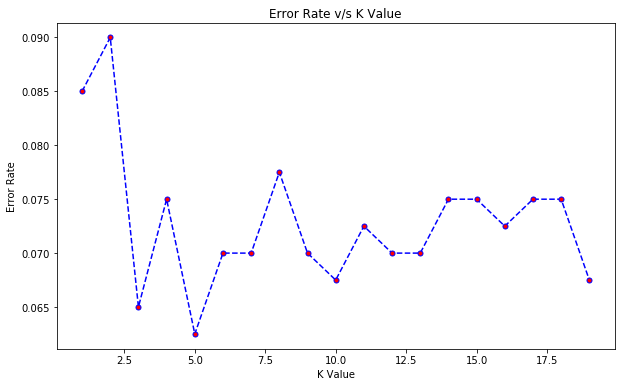

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.title('Error Rate v/s K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [21]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [22]:
knn.score(X_test, y_test)

0.925

In [23]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [24]:
rfc.score(X_test, y_test)

0.8725

In [25]:
print(classification_report(y_test, y_pred_rfc))
print('\n')
print(confusion_matrix(y_test, y_pred_rfc))

             precision    recall  f1-score   support

          0       0.90      0.94      0.92        94
          1       0.80      0.82      0.81       102
          2       0.90      0.80      0.85       120
          3       0.90      0.96      0.93        84

avg / total       0.87      0.87      0.87       400



[[88  6  0  0]
 [10 84  8  0]
 [ 0 15 96  9]
 [ 0  0  3 81]]


In [26]:
print(classification_report(y_test, y_pred_knn))
print('\n')
print(confusion_matrix(y_test, y_pred_knn))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96        94
          1       0.87      0.93      0.90       102
          2       0.92      0.88      0.90       120
          3       0.96      0.93      0.95        84

avg / total       0.93      0.93      0.93       400



[[ 91   3   0   0]
 [  4  95   3   0]
 [  0  11 106   3]
 [  0   0   6  78]]
